# Understand ARGS and if __name__ == "__main__":

!ls

# Important note

In [66]:
%reset -f 

In [ ]:
%reset -f resets all variables. It is very important when testing script in a notebook. 
It prevents variables from being carried from cell to cell. 
an example:
    image = Image.open('test.jpg')
The object variable stays in memory through the whole notebook until reused/reassigned. 
If you plan on reusing, remember what you did. I have found when running and testing scripts it is 
necessary to keep track of vaiables and objects in memory. It is easy to have notebook working fine.
Then close it and reopen the next day and it will not work. That is almost always due to vaiables
in memory, that you forgot were there.
    Or you may copy a nice functioning notebook script in to a file and it will not execute properly, because it was using a 
variable from another cell.

Hint: %reset askes for a confirmation if you use   %reset -f it forces it to release all variables 
      without confirmation.
if you wish to releaseonleone variable simply enter  del ( the variable name ) or ( the variable name ) = None
Example:
    image = Image.open('test.jpg')
    To release the image object / variable above use:
        
image = None
or
del image    

'__main__' is the name of the scope in which top-level code executes.
A module’s __name__ is set equal to '__main__' when read from standard input, a script, or
from an interactive prompt.

A module can discover whether or not it is running in the main scope by checking its own __name__,
which allows a common idiom for conditionally executing code in a module when it is run as a script 
or with python -m but not when it is imported:

if __name__ == "__main__":
    # execute only if run as a script
    main()

Including a __main__.py module, has the same effect for a package if the module is run with -m.
e.g.
user$ python -m myscript.py


In [33]:
!which python

/usr/local/bin/python


# A little about sys.argv

In [ ]:
learn by example:

#### Example1: Below
This example will print only the first arg if multiple args are given.

In [116]:
%%writefile ArgTest1.py
#!/usr/local/bin/python
import sys
a = sys.argv[1]
print a

Overwriting ArgTest1.py


##### Notice I am using 2 args but only the first is being used

In [117]:
!python ArgTest1.py 456 721

456


#### Example 2: Below
This example will print only the second arg if multiple args are given.

In [118]:
%%writefile ArgTest2.py
#!/usr/local/bin/python
import sys
a = sys.argv[2]
print a 
#or 
print sys.argv[2]
# This will print twice to show the argv may be used directly or assigned to a variable.

Overwriting ArgTest2.py


notice the amount of args given do not matter it will print the second sys.argv[2]<br />
This will prints twice to show the argv may be used directly or assigned to a variable.

In [119]:
#ArgTest2.py script executes " print a"  AND " print sys.argv[2] "
!python ArgTest2.py 456 721 34 655

721
721


#### Example 3: Below
This example will print all args if multiple args are given.

In [122]:
%%writefile ArgTest3.py
#!/usr/local/bin/python
import sys
# notice the colon after the 1. sys.argv[1:] - turns into a list
a,b,c,d,e,f = sys.argv[1:]
print sys.argv[1:]
#or identify the elements and get the unformated results
#to work correctly all 6 elements must be supplied
print a,b,c,d,e,f

Overwriting ArgTest3.py


In [127]:
!python ArgTest3.py 456 721 45 2827 234 23

['456', '721', '45', '2827', '234', '23']
456 721 45 2827 234 23


## notice result concatenates a and b it does not add them
They are treated as a string

In [135]:
%%writefile ArgInteger.py
#!/usr/local/bin/python
import sys
# notice the colon after the 1. sys.argv[1:]
a,b = sys.argv[1:]
print a+b

Writing ArgInteger.py


In [136]:
!python ArgInteger.py 456 721

456721


# How to use integers as args

In [129]:
%%writefile ArgInteger01.py
#!/usr/local/bin/python
import sys
# notice the colon after the 1. sys.argv[1:]
a,b = sys.argv[1:]
a=int(a);b=int(b)
print a+b

Writing ArgInteger01.py


In [131]:
!python ArgInteger01.py 456 721

1177


# using a float must me declared as a float not as an integer

In [152]:
%%writefile ArgInteger02.py
#!/usr/local/bin/python
import sys
# notice the colon after the 1. sys.argv[1:]
a,b,c = sys.argv[1:]
a=int(a);b=int(b);c=float(c)
print (a+b)/c

Overwriting ArgInteger02.py


In [153]:
!python ArgInteger02.py 456 721 3.14

374.840764331


# BELOW WILL NOT WORK
The Argv input must be converted to an integer AFTER converted to a variable.

In [137]:
%%writefile ArgInteger0B.py
#!/usr/local/bin/python
import sys
a,b = int(sys.argv[1:])
print a+b

Writing ArgInteger0B.py


In [138]:
!python ArgInteger0B.py 456 721

Traceback (most recent call last):
  File "ArgInteger0B.py", line 3, in <module>
    a,b = int(sys.argv[1:])
TypeError: int() argument must be a string or a number, not 'list'


# the above is an intentional error

In [163]:
# The example below eventhough it requires 3 three args only uses thw first and thisrd ( A and C )

In [164]:
%%writefile ArgInteger03.py
#!/usr/local/bin/python
import sys
A,B,C = sys.argv[1:]
A=int(A);C=int(C)
print A+C

Overwriting ArgInteger03.py


In [165]:
!python ArgInteger03.py 10 2 10

20


# Practical Examples - CSV view

In [172]:
%%writefile viewCSV2.py
import sys
filename = sys.argv[1]
print filename

Overwriting viewCSV2.py


In [173]:
!python viewCSV2.py /home/jack/Desktop/deep-dream-generator/notebooks/CSV_DATA/datasets/LakeHuron.csv

/home/jack/Desktop/deep-dream-generator/notebooks/CSV_DATA/datasets/LakeHuron.csv


# ----------------------------

# Now open and view the file

In [260]:
%%writefile viewCSV.py
#!/usr/local/bin/python
import sys
filename = sys.argv[1]
with open(filename) as myfile:
    head = [next(myfile) for x in xrange(6)]
    mystring = ''.join(head)
    print mystring

Overwriting viewCSV.py


In [261]:
!python viewCSV.py /home/jack/Desktop/deep-dream-generator/notebooks/CSV_DATA/datasets/LakeHuron.csv

"","time","LakeHuron"
"1",1875,580.38
"2",1876,581.86
"3",1877,580.97
"4",1878,580.8
"5",1879,579.79



## -------------------------------------------

In [191]:
%%writefile viewCSV01.py
import sys
#filename = "/home/jack/Desktop/deep-dream-generator/notebooks/CSV_DATA/datasets/LakeHuron.csv"
#filename = sys.argv[1:]
input1 = sys.argv[1]
with open(input1) as myfile:
    head = [next(myfile) for x in xrange(6)]
    xx = "info :"
    dd=xx.join(head)
    print dd

Overwriting viewCSV01.py


In [192]:
!python viewCSV01.py /home/jack/Desktop/deep-dream-generator/notebooks/CSV_DATA/datasets/LakeHuron.csv

"","time","LakeHuron"
info :"1",1875,580.38
info :"2",1876,581.86
info :"3",1877,580.97
info :"4",1878,580.8
info :"5",1879,579.79



# EXAMPLE:
## Dec2Year.py Change a decimal year into full readable year.

In [234]:
%%writefile Dec2Year.py
from datetime import timedelta, datetime
import sys
input1 = sys.argv[1]
number = float(input1)
def ConvertDecimalYear(number):
    year = int(number)
    d = timedelta(days=(number - year)*365)
    day_one = datetime(year,1,1)
    date = d + day_one
    without = date.replace(microsecond=0)
    return without

print ConvertDecimalYear(number)

Overwriting Year2Dec.py


In [236]:
!python Year2Dec.py  1972.333663448

1972-05-01 18:53:30


In [ ]:
# mySum.py Example

In [276]:
%%writefile date2decimel.py
#!/usr/local/bin/python
import sys
MonthNum = int(sys.argv[1]) 
DateI = int(sys.argv[2])
mn = (MonthNum-1)*30.14
r = mn+DateI-1
op = 365.25/r-365.25
print "fraction: ",r/365.25
print "\n"
print "Notice the change format of print after being turned into an object"
fraction = "fraction: ",r/365.25
print fraction

Overwriting date2decimel.py


In [239]:
!python date2decimel.py 10 20

fraction:  0.794688569473


Notice the change format of print after being turned into an object
('fraction: ', 0.7946885694729637)


In [245]:
%%writefile DEC2year.py
import calendar
import sys
fract = float(sys.argv[1]) 
days=(365.25*fract)+30.4166;months = (days/30.4166)
wholeMonth = int(months);monthname=calendar.month_name[wholeMonth]
days=(months-wholeMonth)*24;wholeDay= int(days)
hours = (days-wholeDay)*60;wholeHour=int(hours)
minutes = (hours-wholeHour)*60;minute = int(minutes)
sec = int((minutes-minute)*60)
print "Date:",monthname,wholeDay,wholeHour,minute,sec 


Overwriting DEC2year.py


In [246]:
!python DEC2year.py .7946885694729637

Date: October 13 1 39 15


# -------------------------------

In [362]:
import pandas as pd
from datetime import datetime
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
CsvPath ="../deep-dream-generator/notebooks/CSV_DATA/datasets/co2.csv"
#df = pd.read_csv(CsvPath,  usecols="co2")
data = pd.read_csv(CsvPath, usecols=[2])
print data.to_string(index=False)

co2
315.42
316.31
316.50
317.56
318.13
318.00
316.39
314.65
313.68
313.18
314.66
315.43
316.27
316.81
317.42
318.87
319.87
319.43
318.01
315.74
314.00
313.68
314.84
316.03
316.73
317.54
318.38
319.31
320.42
319.61
318.42
316.63
314.83
315.16
315.94
316.85
317.78
318.40
319.53
320.42
320.85
320.45
319.45
317.25
316.11
315.27
316.53
317.53
318.58
318.92
319.70
321.22
322.08
321.31
319.58
317.61
316.05
315.83
316.91
318.20
319.41
320.07
320.74
321.40
322.06
321.73
320.27
318.54
316.54
316.71
317.53
318.55
319.27
320.28
320.73
321.97
322.00
321.71
321.05
318.71
317.66
317.14
318.70
319.25
320.46
321.43
322.23
323.54
323.91
323.59
322.24
320.20
318.48
317.94
319.63
320.87
322.17
322.34
322.88
324.25
324.83
323.93
322.38
320.76
319.10
319.24
320.56
321.80
322.40
322.99
323.73
324.86
325.40
325.20
323.98
321.95
320.18
320.09
321.16
322.74
323.83
324.26
325.47
326.50
327.21
326.54
325.72
323.50
322.22
321.62
322.69
323.95
324.89
325.82
326.77
327.97
327.91
327.50
326.18
324.53
322.93
322.90
32

In [253]:
import pandas as pd
from datetime import datetime
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
CsvPath ="../deep-dream-generator/notebooks/CSV_DATA/datasets/co2.csv"
#df = pd.read_csv(CsvPath,  usecols="co2")
data = pd.read_csv(CsvPath, usecols=[2])
print data

        co2
0    315.42
1    316.31
2    316.50
3    317.56
4    318.13
5    318.00
6    316.39
7    314.65
8    313.68
9    313.18
10   314.66
11   315.43
12   316.27
13   316.81
14   317.42
15   318.87
16   319.87
17   319.43
18   318.01
19   315.74
20   314.00
21   313.68
22   314.84
23   316.03
24   316.73
25   317.54
26   318.38
27   319.31
28   320.42
29   319.61
..      ...
438  361.94
439  359.50
440  358.11
441  357.80
442  359.61
443  360.74
444  362.09
445  363.29
446  364.06
447  364.76
448  365.45
449  365.01
450  363.70
451  361.54
452  359.51
453  359.65
454  360.80
455  362.38
456  363.23
457  364.06
458  364.61
459  366.40
460  366.84
461  365.68
462  364.52
463  362.57
464  360.24
465  360.83
466  362.49
467  364.34

[468 rows x 1 columns]


In [258]:
import pandas as pd
from datetime import datetime
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
df = pd.read_csv("../deep-dream-generator/notebooks/CSV_DATA/datasets/co2.csv",  usecols=[1])
print df

            time
0    1959.000000
1    1959.083333
2    1959.166667
3    1959.250000
4    1959.333333
5    1959.416667
6    1959.500000
7    1959.583333
8    1959.666667
9    1959.750000
10   1959.833333
11   1959.916667
12   1960.000000
13   1960.083333
14   1960.166667
15   1960.250000
16   1960.333333
17   1960.416667
18   1960.500000
19   1960.583333
20   1960.666667
21   1960.750000
22   1960.833333
23   1960.916667
24   1961.000000
25   1961.083333
26   1961.166667
27   1961.250000
28   1961.333333
29   1961.416667
..           ...
438  1995.500000
439  1995.583333
440  1995.666667
441  1995.750000
442  1995.833333
443  1995.916667
444  1996.000000
445  1996.083333
446  1996.166667
447  1996.250000
448  1996.333333
449  1996.416667
450  1996.500000
451  1996.583333
452  1996.666667
453  1996.750000
454  1996.833333
455  1996.916667
456  1997.000000
457  1997.083333
458  1997.166667
459  1997.250000
460  1997.333333
461  1997.416667
462  1997.500000
463  1997.583333
464  1997.6666

In [350]:
%%writefile SeeCSV.py
#!/usr/local/bin/python
# filename and amount of rows to view
import sys
filename, row = sys.argv[1:]
Nn = int(row)
with open(filename) as myfile:
    head = [next(myfile) for x in xrange(Nn)]
    mystring = ''.join(head)
    print mystring

Overwriting SeeCSV.py


In [351]:
!python SeeCSV.py /home/jack/Desktop/deep-dream-generator/notebooks/CSV_DATA/datasets/co2.csv 8

"","time","co2"
"1",1959,315.42
"2",1959.08333333334,316.31
"3",1959.16666666668,316.5
"4",1959.25000000002,317.56
"5",1959.33333333336,318.13
"6",1959.4166666667,318
"7",1959.50000000004,316.39



In [292]:
%%writefile SeeCSV2.py
#!/usr/local/bin/python
# filename and amount of rows to view
import sys
def main():    
    filename, row = sys.argv[1:]
    Nn = int(row)
    with open(filename) as myfile:
        head = [next(myfile) for x in xrange(Nn)]
        mystring = ''.join(head)
        print mystring
        
if __name__ == "__main__":
    main()

Overwriting SeeCSV2.py


## Run SeeCSV3.py Straight from the python command SeeCSV3.py
## Or use as a module

In [374]:
%reset -f

In [373]:
%%writefile SeeCSV3.py
#!/usr/local/bin/python
# filename and amount of rows to view
import sys
filename = str(sys.argv[1])
row = int(sys.argv[1])
#Nn = int(row)
def main(filename, row):    
    
    with open(filename) as myfile:
        head = [next(myfile) for x in xrange(row)]
        mystring = ''.join(head)
        print mystring
        
if __name__ == "__main__":
    main(filename, row)

Overwriting SeeCSV3.py


In [376]:
%%writefile test.py
import sys
filename = sys.argv[1]
row = sys.argv[2]
Nn = int(row)
print filename,Nn

Writing test.py


In [379]:
!python test.py 34 646

34 646


In [390]:
%%writefile SeeCSV3.py
#!/usr/local/bin/python
# filename and amount of rows to view
import sys
filename = sys.argv[1]
row = sys.argv[2]

def main(filename, row):    
    
    with open(filename) as myfile:
        Nn = int(row)
        head = [next(myfile) for x in xrange(Nn)]
        Mstring=''.join(head)
        print Mstring

if __name__ == "__main__":
    main(filename, row)

Overwriting SeeCSV3.py


In [392]:
!ls ../deep-dream-generator/notebooks/CSV_DATA/datasets

airmiles.csv	   JohnsonJohnson.csv	   stackloss.csv
AirPassengers.csv  LakeHuron.csv	   sunspot.month.csv
airquality.csv	   lh.csv		   sunspots.csv
anscombe.csv	   LifeCycleSavings.csv    sunspot.year.csv
attenu.csv	   longley.csv		   swiss.csv
attitude.csv	   lynx.csv		   Titanic.csv
austres.csv	   morley.csv		   ToothGrowth.csv
BJsales.csv	   mtcars.csv		   treering.csv
BOD.csv		   nhtemp.csv		   trees.csv
cars.csv	   Nile.csv		   UCBAdmissions.csv
chickwts.csv	   nottem.csv		   UKDriverDeaths.csv
co2.csv		   npk.csv		   UKgas.csv
crimtab.csv	   occupationalStatus.csv  USAccDeaths.csv
discoveries.csv    OrchardSprays.csv	   USArrests.csv
esoph.csv	   PlantGrowth.csv	   USJudgeRatings.csv
euro.csv	   precip.csv		   USPersonalExpenditure.csv
faithful.csv	   presidents.csv	   uspop.csv
Formaldehyde.csv   pressure.csv		   VADeaths.csv
freeny.csv	   Puromycin.csv	   volcano.csv
HairEyeColor.csv   quakes.csv		   warpbreaks.csv
infert.csv	   randu.csv		   women.csv
InsectSprays.csv   rivers

In [391]:
!python SeeCSV3.py /home/jack/Desktop/deep-dream-generator/notebooks/CSV_DATA/datasets/co2.csv 8

"","time","co2"
"1",1959,315.42
"2",1959.08333333334,316.31
"3",1959.16666666668,316.5
"4",1959.25000000002,317.56
"5",1959.33333333336,318.13
"6",1959.4166666667,318
"7",1959.50000000004,316.39



In [372]:
import SeeCSV3
filename = "/home/jack/Desktop/deep-dream-generator/notebooks/CSV_DATA/datasets/co2.csv"
row= 8
SeeCSV3.main(filename,row)

"","time","co2"
"1",1959,315.42
"2",1959.08333333334,316.31
"3",1959.16666666668,316.5
"4",1959.25000000002,317.56
"5",1959.33333333336,318.13
"6",1959.4166666667,318
"7",1959.50000000004,316.39



In [139]:
list = [[356], ['b'], ['c']]
newList = [l[0] for l in list]
print newList

[356, 'b', 'c']


In [141]:
# The 365 MUST be a string not a number
List = [['365'], ['b'], ['c']]
newList = [l[0] for l in List]
Simple = (", ".join(newList))
print Simple

365, b, c


In [143]:
List = [[356], ['b'], ['c']]
",".join(str(x) for x in List)

"[356],['b'],['c']"

In [127]:
List = [['a'], ['b'], ['c']]
newList = [l[0] for l in List]
Simple = (" ".join(newList))
print Simple

a b c


In [138]:
List = [[356], ['b'], ['c']]
str(List)


"[[356], ['b'], ['c']]"

In [153]:
#A great variety can be done with this 1:-1 for instance 4:-2 removes the first 4 and last 2
List = [[356], ['b'], ['c']]
newstring = ",".join(str(x) for x in List)

print str(newstring)[1:-1]


356],['b'],['c'


In [128]:
List = [['this'], ['is'], ['testing']]
newList = [l[0] for l in List]
Simple = (" ".join(newList))
print Simple

this is testing


In [142]:
import ast
List = [['a'], ['b'], ['c']]
ast.literal_eval(repr(List))


[['a'], ['b'], ['c']]

In [165]:
List = [[356], ['b'], ['c']]
",".join(str(x) for x in List)

"[356],['b'],['c']"

In [167]:
List = [[356], ['b'], ['c']]
Simple1 = ",".join(str(x) for x in List)
Simple = Simple1.translate(None, "[]'")
print Simple

356,b,c


In [173]:
strinG = "This can remove the same character throughout the text string in this case, aeio and u"
strinG.translate(None, 'aeiou')

'Ths cn rmv th sm chrctr thrght th txt strng n ths cs,  nd  '

In [184]:
strinG = "This can remove the characters from the beginning and end of the text, then convert everything to uppercase"
strinG = strinG.replace('This can', '')[:-38].upper()
print strinG

 REMOVE THE CHARACTERS FROM THE BEGINNING AND END OF THE TEXT


In [189]:
strinG = "This can remove the characters from the beginning and end of the text"

strinG = strinG[:strinG.find('nning') + 1]
print strinG

This can remove the characters from the begin


In [196]:
import string
import re
strinG = {'This can remove the characters from the beginning and end or middle of the text'}

newString = {x.replace('remove', 'replace').replace('characters', 'letters') for x in strinG}
print newString

set(['This can replace the letters from the beginning and end or middle of the text'])


In [200]:
import string
import re
strinG = {'This can remove the characters from the beginning and end or middle of the text'}

newString = {x.replace('remove', 'replace').replace('characters', 'letters') for x in strinG}
print newString
print "\n","Notice what the last line did. I got rid of the 'set id'","\n"
print str(newString)[6:-3]

set(['This can replace the letters from the beginning and end or middle of the text'])

Notice what the last line did. I got rid of the 'set id' 

This can replace the letters from the beginning and end or middle of the text


In [236]:
strinG = 'This can remove the characters from the center of the text'
newstring = strinG[:15] + strinG[19:]
print newstring , "\n" , strinG[:15] , "\n" , strinG[19:]

This can remove characters from the center of the text 
This can remove 
 characters from the center of the text


In [273]:
%%writefile test.data
[315.42,
316.31,
316.5,
317.56,
318.13,
318,
316.39,
314.65,
313.68,
313.18,
314.66,
315.43,
316.27,
316.81,
317.42,
318.87,
319.87,
319.43,
318.01,
315.74,
314,
313.68,
314.84,
316.03,
316.73,
317.54,
318.38,
319.31,
320.42,
319.61,
318.42,
316.63,
314.83,
315.16,
315.94,
316.85,
317.78,
318.4,
319.53,
320.42,
320.85,
320.45,
319.45,
317.25,
316.11,
315.27,
316.53,
317.53,
318.58,
318.92,
319.7,
321.22,
322.08,
321.31,
319.58,
317.61,
316.05,
315.83,
316.91,
318.2,
319.41,
320.07,
320.74,
321.4,
322.06,
321.73,
320.27,
318.54,
316.54,
316.71,
317.53,
318.55,
319.27,
320.28,
320.73,
321.97,
322,
321.71,
321.05,
318.71,
317.66,
317.14,
318.7,
319.25,
320.46]

Overwriting test.data


In [237]:
%%writefile resize640.py
#!/usr/bin/python
__author__ = 'Jack Northrup'
import sys, getopt
from PIL import Image 
image=''
output=''

try:
    myopts, args = getopt.getopt(sys.argv[1:],"i:o:")
except getopt.GetoptError as e:
    print (str(e))
    print("Usage: %s -i input -o output" % sys.argv[0])
    sys.exit(2)

for o, a in myopts:
    if o == '-i':
        image=a
    elif o == '-o':
        output=a

# Display input and output file name passed as the args
print ("Input file : %s and output file: %s" % (image,output) )

Overwriting resize640.py


In [ ]:
https://www.computerhope.com/issues/ch001721.htm

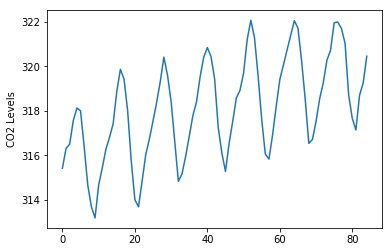

In [266]:
import matplotlib.pyplot as plt
plt.plot([
315.42,
316.31,
316.5,
317.56,
318.13,
318,
316.39,
314.65,
313.68,
313.18,
314.66,
315.43,
316.27,
316.81,
317.42,
318.87,
319.87,
319.43,
318.01,
315.74,
314,
313.68,
314.84,
316.03,
316.73,
317.54,
318.38,
319.31,
320.42,
319.61,
318.42,
316.63,
314.83,
315.16,
315.94,
316.85,
317.78,
318.4,
319.53,
320.42,
320.85,
320.45,
319.45,
317.25,
316.11,
315.27,
316.53,
317.53,
318.58,
318.92,
319.7,
321.22,
322.08,
321.31,
319.58,
317.61,
316.05,
315.83,
316.91,
318.2,
319.41,
320.07,
320.74,
321.4,
322.06,
321.73,
320.27,
318.54,
316.54,
316.71,
317.53,
318.55,
319.27,
320.28,
320.73,
321.97,
322,
321.71,
321.05,
318.71,
317.66,
317.14,
318.7,
319.25,
320.46
])

plt.ylabel('CO2 Levels')
plt.show()

In [267]:
%%writefile test.data
315.42,
316.31,
316.5,
317.56,
318.13,
318,
316.39,
314.65,
313.68,
313.18,
314.66,
315.43,
316.27,
316.81,
317.42,
318.87,
319.87,
319.43,
318.01,
315.74,
314,
313.68,
314.84,
316.03,
316.73,
317.54,
318.38,
319.31,
320.42,
319.61,
318.42,
316.63,
314.83,
315.16,
315.94,
316.85,
317.78,
318.4,
319.53,
320.42,
320.85,
320.45,
319.45,
317.25,
316.11,
315.27,
316.53,
317.53,
318.58,
318.92,
319.7,
321.22,
322.08,
321.31,
319.58,
317.61,
316.05,
315.83,
316.91,
318.2,
319.41,
320.07,
320.74,
321.4,
322.06,
321.73,
320.27,
318.54,
316.54,
316.71,
317.53,
318.55,
319.27,
320.28,
320.73,
321.97,
322,
321.71,
321.05,
318.71,
317.66,
317.14,
318.7,
319.25,
320.46

Writing test.data


# Some Helpful Utility Ideas

In [506]:
# If division result is desired as a float
from __future__ import division
a = 360/365
print a

0.986301369863


In [568]:
#convert date to fraction of years
from datetime import datetime
d = datetime(2017, 6, 28, 0, 0, 0)
(float(d.strftime("%j"))-1) / 366 + float(d.strftime("%Y"))


2017.4863387978141

In [568]:
#convert date to fraction of years
from datetime import datetime
d = datetime(2017, 6, 28, 0, 0, 0)
(float(d.strftime("%j"))-1) / 366 + float(d.strftime("%Y"))


2017.4863387978141

In [636]:
import date2dec
help(date2dec)
#print date2dec.Date2Dec(4, 38)

Help on module date2dec:

NAME
    date2dec

FILE
    /home/jack/Desktop/imagebot/date2dec.py

DESCRIPTION
    #Very rough date to fraction of years
    # no time just numder date

FUNCTIONS
    date2dec(MonthNum, Date)
        #Very rough date to fraction of years
        # no time just numder date

DATA
    fract = 0.4865160848733744




# Working

In [ ]:
#  date2dec
#!/usr/local/bin/python
from __future__ import division
import sys
import math
import argparse
parser = argparse.ArgumentParser(description="""
Convert a date into a fraction of a year
Enter Number of Month and number of day (NO TIME) .
USAGE:
import date2dec
FractionOfYear = date2dec.date2dec(6,27)
print FractionOfYear
""")
args = parser.parse_args()

def date2dec():
    #MonthNum = int(sys.argv[1])
    #Date = int(sys.argv[2])
    
    mn = (MonthNum-1) * 30.14
    r = mn+DateI-1
    op = 365.25/r-365.25
    FractionOfYear = r/365.25
    return FractionOfYear
    
if __name__ == "__main__":
    MonthNum = int(raw_input("What month?"))
    DateI = int(raw_input("What day?"))
    date2dec()
    mn = (MonthNum-1) * 30.14
    r = mn+DateI-1
    op = 365.25/r-365.25
    FractionOfYear = r/365.25
    print FractionOfYear

In [232]:
%%writefile dateTodec.py
#!/usr/local/bin/python
from __future__ import division
import sys
import math
import sys, getopt
MonthNum = int(sys.argv[1]) 
DateI = int(sys.argv[2])

"""
from PIL import Image 
MonthNum = sys.argv[1]
DateI = sys.argv[2]
x=int(MonthNum)
y=int(DateI)
print x, y
#!/usr/bin/python
import sys
MonthNum = int(sys.argv[1]) 
DateI = int(sys.argv[2])
"""

mn = (MonthNum-1)*30.14
r = mn+DateI-1
op = 365.25/r-365.25
print "fraction: ",r/365.25
print "\n"
print "Notice the change format of print after being turned into an object"
fraction = "fraction: ",r/365.25
print fraction





Overwriting dateTodec.py


In [234]:
!python dateTodec.py 2  22


fraction:  0.140013689254


Notice the change format of print after being turned into an object
('fraction: ', 0.14001368925393567)


In [198]:
%reset -f